<a href="https://colab.research.google.com/github/jaothan26/digital_assets_analysis_/blob/main/241117_w_o_cex_chatGPT_end_to_end_on_whales_analysis_only_1_Year_2022(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install web3 --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.2/168.2 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 36.7 MB/s eta 0:00:00


In [ ]:
import random
from web3 import Web3
from datetime import datetime


# Initialize Alchemy or Infura endpoint
alchemy_url = "https://eth-mainnet.g.alchemy.com/v2/OPutfOp_VyXojpS6t3xDlHiUnWCX8D1e"
w3 = Web3(Web3.HTTPProvider(alchemy_url))

In [ ]:
import random
from datetime import datetime

# Initialize a global set to store unique addresses
addresses = set()

def get_addresses_from_random_blocks(w3, year=2023, num_blocks=8):
    """
    Fetches addresses from a random selection of Ethereum blocks for a given year,
    adding new addresses to a global set to enhance results with each call.

    Args:
        w3 (Web3): An instance of the Web3 class connected to an Ethereum node.
        year (int): The year to filter the blocks by (default is 2023).
        num_blocks (int): The number of random blocks to fetch (default is 8).

    Returns:
        set: A set of unique addresses found in the transactions of the selected blocks.
    """
    global addresses  # Use the global set to maintain addresses across calls

    # Get the range of blocks
    block_range_start = w3.eth.get_block("earliest").number
    block_range_end = w3.eth.get_block("latest").number

    # Select random block numbers
    random_block_numbers = random.sample(range(block_range_start, block_range_end), num_blocks)

    addresses_in_year = set()  # Local set to track addresses for the current year

    for block_num in random_block_numbers:
        block = w3.eth.get_block(block_num, full_transactions=True)
        block_time = datetime.utcfromtimestamp(block['timestamp'])  # Convert timestamp to datetime

        # Check if the block time is in the specified year
        if block_time.year == year:
            block_transactions = block['transactions']  # Get transactions from the block

            # Collect addresses from transactions
            for tx in block_transactions:
                try:
                    _from = tx['from']
                    _to = tx['to']
                    if _from and _from.lower():  # Ensure _from is not None or empty
                        addresses_in_year.add(_from)
                    if _to and _to.lower():  # Ensure _to is not None or empty
                        addresses_in_year.add(_to)
                except KeyError:
                    print("Ignore the invalid transaction")

    # Update global unique_addresses set with new addresses found in this call
    addresses.update(addresses_in_year)

    return addresses_in_year  # Return the set of unique addresses for the current year


In [ ]:
 #Iterate through years from 2016 to 2024  (à partir de2016 car avant bp blockchain apparement)
while len(addresses) < 250:
  for year in range(2022, 2023):  # 2025 is exclusive, so it will go up to 2024
    num_blocks = 10  # You can adjust the number of blocks to fetch for each year  #avec 5 recuperer des données e 2017 et 2018 (il avait mis 10)
    print(f"Collecting addresses for year {year}...")
    addresses = get_addresses_from_random_blocks(w3, year=year, num_blocks=num_blocks)
    print(f"Addresses collected for {year}: {addresses}")
print(f"Current address count: {len(addresses)}. Fetching more addresses...")

# Final list of unique addresses across all calls
print("All unique addresses collected:", addresses)

Addresses collected for 2022: set()
Addresses collected for 2022: {'0x86e5e58653B9337e8612ECf4D86f92DE3AeabC1a', '0x46a62dDDA4D132502eaE70F0b1258f119e1b7158', '0xBcAEf0442622Dce1d2026840DF95d5525D1DF4CC', '0x4532280A66a0c1c709f7e0c40B14b4dEA83253C1', '0xA6f851a4029ebb04365571A2ead8CAA8e9F02947', '0x6a936D26E64EAE237D22DeFc0fcDaB95A326b20f', '0xdAC17F958D2ee523a2206206994597C13D831ec7', '0xdaC872853f6f3084dAF0145A95351f0Aea939812', '0xC098B2a3Aa256D2140208C3de6543aAEf5cd3A94', '0x9f7960EDE0358BF5dD6D64328BA59c3c5AD95556', '0x3E614dE0C648b4aF296824f2B787cC30ED915371', '0xeA3818eb2E9f76807D95b1c05d7BEC7c2bFA1129', '0x14633EA8d5D75f895dfb9d15fe82d0042e7Ee042', '0xC7F5897a7997BD2c38EAc4Ada07ba357C7Ed7308', '0x428AB2BA90Eba0a4Be7aF34C9Ac451ab061AC010', '0x7b4E393Deafe2D999de921382D1CAD2Cd3f5862b', '0x2d6775C1673d4cE55e1f827A0D53e62C43d1F304', '0x770bD78BAb6385808e5fc806d838fB2Cd49Bf155', '0x94a6b714e1bC6b2FE8BFA0a769bc804178318E3d', '0x7BFb89db2d7217c57C3Ad3d4B55826eFD17dC2e9', '0x8ba6Cd4F47

In [ ]:
 len(addresses)

464

In [ ]:

# recreate the state of all the addresses for whales (def : 5% of total balance)
state = dict()
for address in addresses:
  balance = w3.from_wei(w3.eth.get_balance(address),'tether')
  state[address] = balance

sorted_state = sorted(state, key=state.get, reverse=True)
selected_addresses = sorted_state[:int(len(sorted_state)*0.05)]
print(selected_addresses)
print("we take 5% of the total wallets by balance and limit to a total of", len(selected_addresses), "whales addresses")


['0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2', '0x28C6c06298d514Db089934071355E5743bf21d60', '0xA7EFAe728D2936e78BDA97dc267687568dD593f3', '0x56Eddb7aa87536c09CCc2793473599fD21A8b17F', '0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549', '0x4976A4A02f38326660D17bf34b431dC6e2eb2327', '0xDFd5293D8e347dFe59E90eFd55b2956a1343963d', '0x9696f59E4d72E237BE84fFD425DCaD154Bf96976', '0xb5d85CBf7cB3EE0D56b3bB207D5Fc4B82f43F511', '0x46340b20830761efd32832A74d7169B29FEB9758', '0xF5C9F957705bea56a7e806943f98F7777B995826', '0x5f65f7b609678448494De4C87521CdF6cEf1e932', '0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5', '0x6081258689a75d253d87cE902A8de3887239Fe80', '0xCBD6832Ebc203e49E2B771897067fce3c58575ac', '0xFF1F2B4ADb9dF6FC8eAFecDcbF96A2B351680455', '0xDB044B8298E04D442FdBE5ce01B8cc8F77130e33', '0x477b8D5eF7C2C42DB84deB555419cd817c336b6F', '0xD1669Ac6044269b59Fa12c5822439F609Ca54F41', '0xA9BfF538A906154c80A8dBccd229F3DEddFa52D6', '0x0e394D3fAcF0Ce3BD5fCcE584E16E0cBAc164346', '0x74dEc05E5b894b0EfEc69Cdf631697

In [ ]:
import time
import requests
import pandas as pd
from web3 import Web3

# Initialize Web3 with Alchemy or Infura endpoint
alchemy_url = "https://eth-mainnet.g.alchemy.com/v2/OPutfOp_VyXojpS6t3xDlHiUnWCX8D1e"
w3 = Web3(Web3.HTTPProvider(alchemy_url))

# Set up API keys
etherscan_api_key = "VQIYPTPDYJQDCHC8YSU5UIKCPBJ6PMFYIY"
moralis_api_key = "W3udXIDi34aiEBCF34OdaSMDUazN5yuhdmMUSHF3WoMiBGyNkJSIYWJO5lm1yFQB"

In [ ]:
# Function to get current ETH balance using Web3
#def get_eth_balance(wallet_address):
   # try:
     #   balance = w3.eth.get_balance(wallet_address)
      #  return float(balance) / 1e18  # Convert from Wei to Ether
    #except Exception as e:
     #   print(f"Error retrieving ETH balance for {wallet_address}: {e}")
      #  return 0.0

In [ ]:
#from web3 import Web3

def handle_address(address):
    """
    Example function that expects an address as a string or bytes.

    Args:
        address (str or bytes): The Ethereum address to handle.

    Returns:
        str: The address as a string in checksum format.
    """
    # Debug output to inspect the input
    print(f'Type of address: {type(address)}, Value: {address}')

    if isinstance(address, bytes):
        # Convert bytes to hex string
        address = w3.to_hex(address)  # Convert bytes to a hex string
    elif not isinstance(address, str):
        raise ValueError("Address must be a string.")

    # Convert to checksum address
    checksum_address = w3.to_checksum_address(address)

    # Further processing with the checksum address
    print(f'Handling address: {checksum_address}')
    return checksum_address

def is_valid_hex(hex_str):
    """ Check if a string is a valid hexadecimal number. """
    # Check if the string contains only hex characters and has even length
    return all(c in '0123456789abcdefABCDEF' for c in hex_str) and len(hex_str) % 2 == 0

def convert_addresses(original_addresses):
    """ Convert a list of original addresses from hex string to checksum format. """
    converted_addresses = []

    for hex_address in original_addresses:
        try:
            # Validate the hexadecimal address
            if not is_valid_hex(hex_address[2:]):  # Skip '0x' prefix for validation
                raise ValueError(f"Invalid hexadecimal address: {hex_address}")

            # Convert the hex address string to bytes
            byte_address = bytes.fromhex(hex_address[2:])  # Skip '0x' prefix for bytes conversion
            # Call the handle_address function and store the result
            converted_addresses.append(handle_address(byte_address))
        except ValueError as e:
            print(f'ValueError: {e}')  # Catch and print ValueErrors
        except Exception as ex:
            print(f'An error occurred: {ex}')  # Catch and print any other exceptions

    return converted_addresses

# List of original hexadecimal address strings
original_hex_addresses = selected_addresses



# Convert all original addresses
converted_addresses = convert_addresses(original_hex_addresses)

# Print the converted addresses
print("\nConverted Checksum Addresses:")
for addr in converted_addresses:
    print(addr)


Type of address: <class 'bytes'>, Value: b"\xc0*\xaa9\xb2#\xfe\x8d\n\x0e\\O'\xea\xd9\x08<ul\xc2"
Handling address: 0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2
Type of address: <class 'bytes'>, Value: b'(\xc6\xc0b\x98\xd5\x14\xdb\x08\x994\x07\x13U\xe5t;\xf2\x1d`'
Handling address: 0x28C6c06298d514Db089934071355E5743bf21d60
Type of address: <class 'bytes'>, Value: b'\xa7\xef\xaer\x8d)6\xe7\x8b\xda\x97\xdc&v\x87V\x8d\xd5\x93\xf3'
Handling address: 0xA7EFAe728D2936e78BDA97dc267687568dD593f3
Type of address: <class 'bytes'>, Value: b"V\xed\xdbz\xa8u6\xc0\x9c\xcc'\x93G5\x99\xfd!\xa8\xb1\x7f"
Handling address: 0x56Eddb7aa87536c09CCc2793473599fD21A8b17F
Type of address: <class 'bytes'>, Value: b'!\xa3\x1e\xe1\xaf\xc5\x1d\x94\xc2\xef\xcc\xaa \x92\xad\x10((UI'
Handling address: 0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549
Type of address: <class 'bytes'>, Value: b"Iv\xa4\xa0/82f`\xd1{\xf3KC\x1d\xc6\xe2\xeb#'"
Handling address: 0x4976A4A02f38326660D17bf34b431dC6e2eb2327
Type of address: <class 'byte

In [ ]:


def get_balance(address):
    """Retrieve the ETH balance for a given address."""
    try:
        # Ensure the address is in checksum format
        checksum_address = w3.to_checksum_address(address)
        balance = w3.eth.get_balance(checksum_address)  # Get balance in Wei
        return w3.from_wei(balance, 'ether')  # Convert Wei to Ether
    except Exception as e:
        print(f"Error retrieving balance for {address}: {e}")
        return None

# List of original hexadecimal address strings
original_hex_addresses = converted_addresses

# Retrieve balances for all addresses
balances = {}
for hex_address in original_hex_addresses:
    balance = get_balance(hex_address)
    if balance is not None:
        balances[hex_address] = balance

# Print the balances
print("\nETH Balances:")
for addr, bal in balances.items():
    print(f"Address: {addr} - Balance: {bal} ETH")



ETH Balances:
Address: 0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2 - Balance: 2932214.833085909184472557 ETH
Address: 0x28C6c06298d514Db089934071355E5743bf21d60 - Balance: 102580.467722868513758051 ETH
Address: 0xA7EFAe728D2936e78BDA97dc267687568dD593f3 - Balance: 71191.163665590936600098 ETH
Address: 0x56Eddb7aa87536c09CCc2793473599fD21A8b17F - Balance: 48505.925618503862549437 ETH
Address: 0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549 - Balance: 43282.96079845372614651 ETH
Address: 0x4976A4A02f38326660D17bf34b431dC6e2eb2327 - Balance: 43000.218169873882718734 ETH
Address: 0xDFd5293D8e347dFe59E90eFd55b2956a1343963d - Balance: 42519.763253551320025531 ETH
Address: 0x9696f59E4d72E237BE84fFD425DCaD154Bf96976 - Balance: 38993.25679413194682404 ETH
Address: 0xb5d85CBf7cB3EE0D56b3bB207D5Fc4B82f43F511 - Balance: 19365.082182527554846293 ETH
Address: 0x46340b20830761efd32832A74d7169B29FEB9758 - Balance: 12584.35199103387262414 ETH
Address: 0xF5C9F957705bea56a7e806943f98F7777B995826 - Balance: 70

In [ ]:
from web3 import Web3

# Connect to Ethereum node (Infura/Alchemy)
#infura_url = "YOUR_INFURA_OR_ALCHEMY_URL"
#web3 = Web3(Web3.HTTPProvider(infura_url))

# List of wallet addresses to check
#wallet_addresses = addresses #["WALLET_ADDRESS_1", "WALLET_ADDRESS_2", "WALLET_ADDRESS_3"]
wallet_addresses = original_hex_addresses
# List of stablecoin contract addresses (USDT, USDC, DAI as examples)
stablecoins = {
    "USDT": "0xdAC17F958D2ee523a2206206994597C13D831ec7",
    "USDC": "0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606EB48",
    "DAI": "0x6B175474E89094C44Da98b954EedeAC495271d0F"
}

# Convert all stablecoin addresses to checksum format
stablecoins = {name: w3.to_checksum_address(addr) for name, addr in stablecoins.items()}

# ERC-20 ABI for balanceOf and decimals functions
erc20_abi = [
    {
        "constant": True,
        "inputs": [{"name": "_owner", "type": "address"}],
        "name": "balanceOf",
        "outputs": [{"name": "balance", "type": "uint256"}],
        "type": "function",
    },
    {
        "constant": True,
        "inputs": [],
        "name": "decimals",
        "outputs": [{"name": "", "type": "uint8"}],
        "type": "function",
    }
]

# Function to get stablecoin balances for multiple wallets
def get_stablecoin_balances(wallets):
    all_balances = {}
    for wallet in wallets:
        wallet_balances = {}
        for name, contract_address in stablecoins.items():
            try:
                # Load contract
                contract = w3.eth.contract(address=contract_address, abi=erc20_abi)

                # Get balance and decimals
                balance = contract.functions.balanceOf(w3.to_checksum_address(wallet)).call()
                decimals = contract.functions.decimals().call()

                # Adjust balance based on token decimals
                adjusted_balance = balance / (10 ** decimals)
                wallet_balances[name] = adjusted_balance

            except Exception as e:
                print(f"Error fetching balance for {name} at {wallet}: {e}")
                wallet_balances[name] = None
        # Store balances for the wallet
        all_balances[wallet] = wallet_balances
    return all_balances

# Retrieve stablecoin balances for multiple addresses
balances_stablecoin = get_stablecoin_balances(wallet_addresses)
print("Stablecoin Balances for each wallet:", balances)


Stablecoin Balances for each wallet: {'0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2': Decimal('2932214.833085909184472557'), '0x28C6c06298d514Db089934071355E5743bf21d60': Decimal('102580.467722868513758051'), '0xA7EFAe728D2936e78BDA97dc267687568dD593f3': Decimal('71191.163665590936600098'), '0x56Eddb7aa87536c09CCc2793473599fD21A8b17F': Decimal('48505.925618503862549437'), '0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549': Decimal('43282.96079845372614651'), '0x4976A4A02f38326660D17bf34b431dC6e2eb2327': Decimal('43000.218169873882718734'), '0xDFd5293D8e347dFe59E90eFd55b2956a1343963d': Decimal('42519.763253551320025531'), '0x9696f59E4d72E237BE84fFD425DCaD154Bf96976': Decimal('38993.25679413194682404'), '0xb5d85CBf7cB3EE0D56b3bB207D5Fc4B82f43F511': Decimal('19365.082182527554846293'), '0x46340b20830761efd32832A74d7169B29FEB9758': Decimal('12584.35199103387262414'), '0xF5C9F957705bea56a7e806943f98F7777B995826': Decimal('7087.7985877'), '0x5f65f7b609678448494De4C87521CdF6cEf1e932': Decimal('5543.7

In [ ]:
# Initialize a dictionary to hold the sums for each address
sum_balances = {}

# Iterate through each address and its corresponding stablecoin balances
for address, stablecoin_balances in balances_stablecoin.items():
    # Initialize total balance for the current address
    total_balance = 0

    # Sum values for USDC, DAI, and USDT
    for coin in ['USDT', 'USDC', 'DAI']:
        total_balance += stablecoin_balances.get(coin, 0)  # Use .get to avoid KeyError

    # Store the total balance in the results dictionary
    sum_balances[address] = total_balance

# Print the results
for address, total in sum_balances.items():
    print(f"Address: {address} - Total Stablecoin Balance: {total:.2f}")

Address: 0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2 - Total Stablecoin Balance: 35564.67
Address: 0x28C6c06298d514Db089934071355E5743bf21d60 - Total Stablecoin Balance: 2333114912.06
Address: 0xA7EFAe728D2936e78BDA97dc267687568dD593f3 - Total Stablecoin Balance: 2042.18
Address: 0x56Eddb7aa87536c09CCc2793473599fD21A8b17F - Total Stablecoin Balance: 1008151772.56
Address: 0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549 - Total Stablecoin Balance: 1131351571.05
Address: 0x4976A4A02f38326660D17bf34b431dC6e2eb2327 - Total Stablecoin Balance: 0.00
Address: 0xDFd5293D8e347dFe59E90eFd55b2956a1343963d - Total Stablecoin Balance: 734761618.09
Address: 0x9696f59E4d72E237BE84fFD425DCaD154Bf96976 - Total Stablecoin Balance: 397246317.04
Address: 0xb5d85CBf7cB3EE0D56b3bB207D5Fc4B82f43F511 - Total Stablecoin Balance: 4012.33
Address: 0x46340b20830761efd32832A74d7169B29FEB9758 - Total Stablecoin Balance: 76582854.77
Address: 0xF5C9F957705bea56a7e806943f98F7777B995826 - Total Stablecoin Balance: 6990.43
Ad

In [ ]:
for addr, bal in balances_stablecoin.items():
    print(f"Address: {addr} - Balance stablecoins: {bal}")
for addr, bal in balances.items():
    print(f"Address: {addr} - Balance: {bal} ETH")
#for address, total_value in address_value_sum.items():
  #  print(f"Address: {address}, Total Value: {total_value} ETH")
for address, total in sum_balances.items():
    print(f"Address: {address} - Total Stablecoin Balance: {total:.2f}")

Address: 0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2 - Balance stablecoins: {'USDT': 21195.262787, 'USDC': 6124.268984, 'DAI': 8245.13460173}
Address: 0x28C6c06298d514Db089934071355E5743bf21d60 - Balance stablecoins: {'USDT': 1492838285.948674, 'USDC': 839325569.145369, 'DAI': 951056.9640115055}
Address: 0xA7EFAe728D2936e78BDA97dc267687568dD593f3 - Balance stablecoins: {'USDT': 2042.18, 'USDC': 0.0, 'DAI': 0.0}
Address: 0x56Eddb7aa87536c09CCc2793473599fD21A8b17F - Balance stablecoins: {'USDT': 1008151772.564629, 'USDC': 0.0, 'DAI': 0.0}
Address: 0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549 - Balance stablecoins: {'USDT': 1037865126.07576, 'USDC': 93486444.472921, 'DAI': 0.500309278291287}
Address: 0x4976A4A02f38326660D17bf34b431dC6e2eb2327 - Balance stablecoins: {'USDT': 0.0, 'USDC': 0.0, 'DAI': 0.0}
Address: 0xDFd5293D8e347dFe59E90eFd55b2956a1343963d - Balance stablecoins: {'USDT': 626937238.675291, 'USDC': 107824378.715179, 'DAI': 0.69764503}
Address: 0x9696f59E4d72E237BE84fFD425DCaD154

In [ ]:
#balances.keys
#address_value_sum.keys

In [ ]:
import pandas as pd

all_addresses = set(sum_balances.keys()).union(balances.keys())
#.union(address_value_sum.keys())

data = {
    'address': [],
    'balance': [],
    'balance_total_stablecoins': [],
    #'total_value_cex': []
}

for address in all_addresses:
    data['address'].append(address)
    data['balance'].append(balances.get(address, 0))  # Default to 0 if no ETH balance
    data['balance_total_stablecoins'].append(sum_balances.get(address, 0))  # Default to 0 if no stablecoin balance
    #data['total_value_cex'].append(address_value_sum.get(address, 0))  # Default to 0 if no total value

# Step 2: Create the DataFrame
df = pd.DataFrame(data)

# Display the resulting DataFrame
print("DataFrame with Balance, Balance Stablecoins, and Total Value per Unique Address:\n", df)
df

DataFrame with Balance, Balance Stablecoins, and Total Value per Unique Address:
                                        address                     balance  \
0   0xA7EFAe728D2936e78BDA97dc267687568dD593f3    71191.163665590936600098   
1   0x28C6c06298d514Db089934071355E5743bf21d60   102580.467722868513758051   
2   0x9696f59E4d72E237BE84fFD425DCaD154Bf96976     38993.25679413194682404   
3   0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549     43282.96079845372614651   
4   0xb5d85CBf7cB3EE0D56b3bB207D5Fc4B82f43F511    19365.082182527554846293   
5   0x80C67432656d59144cEFf962E8fAF8926599bCF8      125.133462239789621987   
6   0xF5C9F957705bea56a7e806943f98F7777B995826                7087.7985877   
7   0x6081258689a75d253d87cE902A8de3887239Fe80     4078.864094313937877253   
8   0x5f65f7b609678448494De4C87521CdF6cEf1e932     5543.774650547132234715   
9   0xDB044B8298E04D442FdBE5ce01B8cc8F77130e33      844.654674315526667402   
10  0xD1669Ac6044269b59Fa12c5822439F609Ca54F41      541.1976

,address,balance,balance_total_stablecoins
0,0xA7EFAe728D2936e78BDA97dc267687568dD593f3,71191.163665590936600098,2.042180e+03
1,0x28C6c06298d514Db089934071355E5743bf21d60,102580.467722868513758051,2.333115e+09
2,0x9696f59E4d72E237BE84fFD425DCaD154Bf96976,38993.25679413194682404,3.972463e+08
3,0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549,43282.96079845372614651,1.131352e+09
4,0xb5d85CBf7cB3EE0D56b3bB207D5Fc4B82f43F511,19365.082182527554846293,4.012333e+03
5,0x80C67432656d59144cEFf962E8fAF8926599bCF8,125.133462239789621987,2.705006e+02
6,0xF5C9F957705bea56a7e806943f98F7777B995826,7087.7985877,6.990426e+03
7,0x6081258689a75d253d87cE902A8de3887239Fe80,4078.864094313937877253,6.587047e+05
8,0x5f65f7b609678448494De4C87521CdF6cEf1e932,5543.774650547132234715,7.169916e+05
9,0xDB044B8298E04D442FdBE5ce01B8cc8F77130e33,844.654674315526667402,1.000000e+01


ATTENTION ICI ENDBLOCK ET START  BLOCK UNIQUEMENT POUR 2022 (SINON DOIT REPRENDRE LA FUNCTION QUI GENERE UNE DATE DEPUIS UN BLOC°

In [ ]:
import requests
from datetime import datetime
etherscan_api_key = "VQIYPTPDYJQDCHC8YSU5UIKCPBJ6PMFYIY"
def get_transactions_for_address(address):
    """
    Retrieve transactions for a given Ethereum address using the Etherscan API.

    Parameters:
    - address (str): The Ethereum address to look up.

    Returns:
    - list: A list of transactions with 'timestamp' and other details.
    """
    try:
        # Define the Etherscan API endpoint
        etherscan_api_url = "https://api.etherscan.io/api"

        # API parameters for the transaction list
        params = {
            'module': 'account',
            'action': 'txlist',
            'address': address,
            'startblock': 13919298,             #Latest Block Number at Jan 01-2022 11:31:41 AM (UTC)
            'endblock': 16304463,               #Latest Block Number at Dec 31-2022 11:31:30 AM (UTC)
            'sort': 'asc',  # Sort ascending to get the first transaction easily
            'apikey': "VQIYPTPDYJQDCHC8YSU5UIKCPBJ6PMFYIY"  # Replace with your Etherscan API key
        }

        # Make the request to Etherscan API
        response = requests.get(etherscan_api_url, params=params)
        response_data = response.json()  # Parse the JSON response here

        # Check if the response contains transactions
        if response_data.get('status') != '1' or 'result' not in response_data:
            print("No transactions found or an error occurred.")
            return []

        # Parse transactions and keep only the relevant fields
        transactions = [
            {
                'hash': tx['hash'],
                'timestamp': int(tx['timeStamp']),
                'value': int(tx['value']),
                'from': tx['from'],
                'to': tx['to']
            }
            for tx in response_data['result']
        ]

        return transactions

    except Exception as e:
        print(f"Error retrieving transactions for address {address}: {e}")
        return []

# Example usage
#address = '0x5f65f7b609678448494De4C87521CdF6cEf1e932'
transactions = get_transactions_for_address(selected_addresses)
print(transactions)  # List of transactions with timestamps and other details


[{'hash': '0x9b1cc3a2c11562650b21f4dab130734424ed1d01da032b058ed9c8b42c69bb85', 'timestamp': 1641638363, 'value': 2000000000000000000, 'from': '0x151409521fc4af3dbace6d97fd4148a44bf07300', 'to': '0x80c67432656d59144ceff962e8faf8926599bcf8'}, {'hash': '0x90719fc0dca130b99be8327dcbb4dc520b18dadd058e7968a6e5c9e10f409c2b', 'timestamp': 1641784176, 'value': 4990000000000003, 'from': '0x80c67432656d59144ceff962e8faf8926599bcf8', 'to': '0xc13d8e8d9bb1844cf514f9c7ab50a3950dfa4eed'}, {'hash': '0x87d68d977d5834c7cf8e82350b52b3184202cbdbcf70b14728bb127b1eb73562', 'timestamp': 1641813442, 'value': 4990000000000057, 'from': '0x80c67432656d59144ceff962e8faf8926599bcf8', 'to': '0xe5716d6168ef103aef9c815135df3e38ec488716'}, {'hash': '0xfa972d14307821c822585bcf9cb5fc495e3289ffe8cc873c5b80c42c9a310292', 'timestamp': 1641816081, 'value': 15300000000009003, 'from': '0x2e4c1778f8f4d28f61f4676d9f4a75b37c88c26c', 'to': '0x80c67432656d59144ceff962e8faf8926599bcf8'}, {'hash': '0x09b6953a1bab20c287dfe22842870ec

In [ ]:
from datetime import datetime

def get_date(addresses, date_type="first"):
    """
    Retrieve the transaction date for a list of wallet addresses.

    Parameters:
    - addresses (list): A list of wallet addresses to look up.
    - date_type (str): 'first' for the earliest transaction date, 'last' for the most recent.

    Returns:
    - dict: A dictionary where each key is an address and the value is the transaction date in 'YYYY-MM-DD' format.
    """
    # Initialize a dictionary to store results
    address_dates = {}

    for address in addresses:
        try:
            # Ensure the address is in checksum format
            checksum_address = w3.to_checksum_address(address)

            # Retrieve all transactions for the given address (this is a placeholder)
            # You'll need a function or service that provides transactions for this address
            transactions = get_transactions_for_address(checksum_address)  # Replace with your method

            # Check if transactions are found
            if not transactions:
                print(f"No transactions found for address {checksum_address}")
                address_dates[address] = None
                continue

            # Extract dates and sort by date
            transaction_dates = [datetime.fromtimestamp(tx['timestamp']) for tx in transactions]

            # Get the first or last transaction date based on date_type
            if date_type == "first":
                date_result = min(transaction_dates)
            elif date_type == "last":
                date_result = max(transaction_dates)
            else:
                raise ValueError("date_type must be either 'first' or 'last'")

            # Store the result in the dictionary
            address_dates[address] = date_result.strftime('%Y-%m-%d')  # Date in 'YYYY-MM-DD' format

        except Exception as e:
            print(f"Error retrieving date for address {address}: {e}")
            address_dates[address] = None  # Assign None if there's an error

    return address_dates




Peut être problème ici car récupère que 2022-01-01 à cause de date type  first? J'ai mis last pour avoir des différences de dates

In [ ]:
# Example usage
#addresses = ['0x5f65f7b609678448494De4C87521CdF6cEf1e932', '0x0b0F7ebF967146566799229394171FC47f1a765a']
#dates = get_date(converted_addresses, date_type="first")
dates = get_date(converted_addresses,date_type="last")
print(dates)  # Dictionary with addresses as keys and dates as value
#Blockchain address checker : https://blockexplorer.one/binance-smart-chain/testnet/address/0x28C6c06298d514Db089934071355E5743bf21d60

{'0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2': '2022-01-01', '0x28C6c06298d514Db089934071355E5743bf21d60': '2022-01-02', '0xA7EFAe728D2936e78BDA97dc267687568dD593f3': '2022-01-06', '0x56Eddb7aa87536c09CCc2793473599fD21A8b17F': '2022-01-03', '0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549': '2022-01-02', '0x4976A4A02f38326660D17bf34b431dC6e2eb2327': '2022-01-03', '0xDFd5293D8e347dFe59E90eFd55b2956a1343963d': '2022-01-02', '0x9696f59E4d72E237BE84fFD425DCaD154Bf96976': '2022-01-03', '0xb5d85CBf7cB3EE0D56b3bB207D5Fc4B82f43F511': '2022-01-01', '0x46340b20830761efd32832A74d7169B29FEB9758': '2022-01-02', '0xF5C9F957705bea56a7e806943f98F7777B995826': '2022-02-07', '0x5f65f7b609678448494De4C87521CdF6cEf1e932': '2022-01-04', '0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5': '2022-01-03', '0x6081258689a75d253d87cE902A8de3887239Fe80': '2022-05-24', '0xCBD6832Ebc203e49E2B771897067fce3c58575ac': '2022-01-28', '0xFF1F2B4ADb9dF6FC8eAFecDcbF96A2B351680455': '2022-07-13', '0xDB044B8298E04D442FdBE5ce01B8cc8F7713

In [ ]:

# Get the unique addresses from the DataFrame
addresses = df['address'].unique().tolist()

# Retrieve the dates for each unique address
dates_dict = get_date(converted_addresses, date_type="first")  # or "last" depending on your need

# Map the dates to the addresses in the DataFrame
df['Date'] = df['address'].map(dates_dict)

# Display the updated DataFrame
print(df)
df

                                       address                     balance  \
0   0xA7EFAe728D2936e78BDA97dc267687568dD593f3    71191.163665590936600098   
1   0x28C6c06298d514Db089934071355E5743bf21d60   102580.467722868513758051   
2   0x9696f59E4d72E237BE84fFD425DCaD154Bf96976     38993.25679413194682404   
3   0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549     43282.96079845372614651   
4   0xb5d85CBf7cB3EE0D56b3bB207D5Fc4B82f43F511    19365.082182527554846293   
5   0x80C67432656d59144cEFf962E8fAF8926599bCF8      125.133462239789621987   
6   0xF5C9F957705bea56a7e806943f98F7777B995826                7087.7985877   
7   0x6081258689a75d253d87cE902A8de3887239Fe80     4078.864094313937877253   
8   0x5f65f7b609678448494De4C87521CdF6cEf1e932     5543.774650547132234715   
9   0xDB044B8298E04D442FdBE5ce01B8cc8F77130e33      844.654674315526667402   
10  0xD1669Ac6044269b59Fa12c5822439F609Ca54F41      541.197691427726156848   
11  0xDFd5293D8e347dFe59E90eFd55b2956a1343963d    42519.76325355

,address,balance,balance_total_stablecoins,Date
0,0xA7EFAe728D2936e78BDA97dc267687568dD593f3,71191.163665590936600098,2.042180e+03,2022-01-01
1,0x28C6c06298d514Db089934071355E5743bf21d60,102580.467722868513758051,2.333115e+09,2022-01-01
2,0x9696f59E4d72E237BE84fFD425DCaD154Bf96976,38993.25679413194682404,3.972463e+08,2022-01-01
3,0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549,43282.96079845372614651,1.131352e+09,2022-01-01
4,0xb5d85CBf7cB3EE0D56b3bB207D5Fc4B82f43F511,19365.082182527554846293,4.012333e+03,2022-01-01
5,0x80C67432656d59144cEFf962E8fAF8926599bCF8,125.133462239789621987,2.705006e+02,2022-01-08
6,0xF5C9F957705bea56a7e806943f98F7777B995826,7087.7985877,6.990426e+03,2022-01-01
7,0x6081258689a75d253d87cE902A8de3887239Fe80,4078.864094313937877253,6.587047e+05,2022-03-29
8,0x5f65f7b609678448494De4C87521CdF6cEf1e932,5543.774650547132234715,7.169916e+05,2022-01-01
9,0xDB044B8298E04D442FdBE5ce01B8cc8F77130e33,844.654674315526667402,1.000000e+01,2022-01-01


In [ ]:
import requests
import pandas as pd

def get_eth_usd_price():
    """
    Retrieve the current price of 1 ETH in USD using CoinGecko API.

    Returns:
    - float: The current ETH to USD price.
    """
    try:
        # CoinGecko API for the current price of Ethereum in USD
        response = requests.get('https://api.coingecko.com/api/v3/simple/price?ids=ethereum&vs_currencies=usd')
        response_data = response.json()

        # Extract the price from the response
        eth_usd_price = response_data['ethereum']['usd']
        return eth_usd_price

    except Exception as e:
        print(f"Error retrieving ETH to USD price: {e}")
        return None

# Sample DataFrame with wallet balances in ETH

# Retrieve the ETH to USD price

# Calculate the USD Value for each wallet based on the ETH balance
    if eth_usd_price:
      df['BalancePriceUSD'] = df['balance'].apply(float)  * eth_usd_price
    #df['PriceUSD'] = eth_usd_price


# Display the updated DataFrame
print(df)


                                       address                     balance  \
0   0xA7EFAe728D2936e78BDA97dc267687568dD593f3    71191.163665590936600098   
1   0x28C6c06298d514Db089934071355E5743bf21d60   102580.467722868513758051   
2   0x9696f59E4d72E237BE84fFD425DCaD154Bf96976     38993.25679413194682404   
3   0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549     43282.96079845372614651   
4   0xb5d85CBf7cB3EE0D56b3bB207D5Fc4B82f43F511    19365.082182527554846293   
5   0x80C67432656d59144cEFf962E8fAF8926599bCF8      125.133462239789621987   
6   0xF5C9F957705bea56a7e806943f98F7777B995826                7087.7985877   
7   0x6081258689a75d253d87cE902A8de3887239Fe80     4078.864094313937877253   
8   0x5f65f7b609678448494De4C87521CdF6cEf1e932     5543.774650547132234715   
9   0xDB044B8298E04D442FdBE5ce01B8cc8F77130e33      844.654674315526667402   
10  0xD1669Ac6044269b59Fa12c5822439F609Ca54F41      541.197691427726156848   
11  0xDFd5293D8e347dFe59E90eFd55b2956a1343963d    42519.76325355

In [ ]:
import requests
import pandas as pd

def get_eth_price_on_date_cryptocompare(date_str):
    # Convert date to timestamp
    timestamp = int(pd.to_datetime(date_str).timestamp())
    url = f'https://min-api.cryptocompare.com/data/pricehistorical'
    params = {
        'fsym': 'ETH',
        'tsyms': 'USD',
        'ts': timestamp,
        'api_key': 'YOUR_API_KEY'  # Replace with your CryptoCompare API key
    }
    try:
        response = requests.get(url, params=params)
        response.raise_for_status()
        data = response.json()
        eth_price = data['ETH']['USD']
        return eth_price
    except Exception as e:
        print(f"Error retrieving ETH price from CryptoCompare: {e}")
        return None

# Test with a specific date
#price_on_date = get_eth_price_on_date_cryptocompare("2023-10-01")
#print(f"ETH price on 2023-10-01: {price_on_date} USD")

def add_price_usd_column(df):
    """
    Adds a 'PriceUSD' column to the DataFrame with the daily ETH price in USD.
    """
    prices = []
    for date in df['Date']:
        eth_price = get_eth_price_on_date_cryptocompare(date)
        prices.append(eth_price)
        #sleep(1)  # To respect rate limits and avoid hitting API restrictions

    df['PriceUSD'] = prices

# Add PriceUSD column to the DataFrame based on historical prices
add_price_usd_column(df)

# Display the updated DataFrame
print(df)


                                       address                     balance  \
0   0xA7EFAe728D2936e78BDA97dc267687568dD593f3    71191.163665590936600098   
1   0x28C6c06298d514Db089934071355E5743bf21d60   102580.467722868513758051   
2   0x9696f59E4d72E237BE84fFD425DCaD154Bf96976     38993.25679413194682404   
3   0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549     43282.96079845372614651   
4   0xb5d85CBf7cB3EE0D56b3bB207D5Fc4B82f43F511    19365.082182527554846293   
5   0x80C67432656d59144cEFf962E8fAF8926599bCF8      125.133462239789621987   
6   0xF5C9F957705bea56a7e806943f98F7777B995826                7087.7985877   
7   0x6081258689a75d253d87cE902A8de3887239Fe80     4078.864094313937877253   
8   0x5f65f7b609678448494De4C87521CdF6cEf1e932     5543.774650547132234715   
9   0xDB044B8298E04D442FdBE5ce01B8cc8F77130e33      844.654674315526667402   
10  0xD1669Ac6044269b59Fa12c5822439F609Ca54F41      541.197691427726156848   
11  0xDFd5293D8e347dFe59E90eFd55b2956a1343963d    42519.76325355

In [ ]:
df["Price Change"] = df["PriceUSD"].pct_change().fillna(0)
df["ETH_Stablecoin_Ratio"] = df["balance"].apply(float) / (df["balance_total_stablecoins"] + 1e-9)    #ETH balance
# Ensure 'Date' is in datetime format if not already
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# Sort the DataFrame by the 'Date' column in ascending order
df = df.sort_values(by='Date', ascending=True)
# Reset index if needed after sorting
df = df.reset_index(drop=True)


In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
address,0xA7EFAe728D2936e78BDA97dc267687568dD593f3,0x283Af0B28c62C092C9727F1Ee09c02CA627EB7F5,0x4976A4A02f38326660D17bf34b431dC6e2eb2327,0xCBD6832Ebc203e49E2B771897067fce3c58575ac,0x477b8D5eF7C2C42DB84deB555419cd817c336b6F,0xA9BfF538A906154c80A8dBccd229F3DEddFa52D6,0x56Eddb7aa87536c09CCc2793473599fD21A8b17F,0x74dEc05E5b894b0EfEc69Cdf6316971802A2F9a1,0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2,0xD1669Ac6044269b59Fa12c5822439F609Ca54F41,...,0xb5d85CBf7cB3EE0D56b3bB207D5Fc4B82f43F511,0x21a31Ee1afC51d94C2eFcCAa2092aD1028285549,0x9696f59E4d72E237BE84fFD425DCaD154Bf96976,0x28C6c06298d514Db089934071355E5743bf21d60,0xDB044B8298E04D442FdBE5ce01B8cc8F77130e33,0x46340b20830761efd32832A74d7169B29FEB9758,0x80C67432656d59144cEFf962E8fAF8926599bCF8,0x6081258689a75d253d87cE902A8de3887239Fe80,0x0e394D3fAcF0Ce3BD5fCcE584E16E0cBAc164346,0xFF1F2B4ADb9dF6FC8eAFecDcbF96A2B351680455
balance,71191.163665590936600098,4220.016891615829798217,43000.218169873882718734,1989.380469412842158677,666.239217790276912411,522.548149378023333923,48505.925618503862549437,302.980413346198098991,2932214.833085909184472557,541.197691427726156848,...,19365.082182527554846293,43282.96079845372614651,38993.25679413194682404,102580.467722868513758051,844.654674315526667402,12584.35199103387262414,125.133462239789621987,4078.864094313937877253,471.963914781244418764,916.919396627963496632
balance_total_stablecoins,2042.18,4226.063466,0.0,0.0,1085787.719344,1493992.093093,1008151772.564629,481952.647764,35564.666373,10659633.049479,...,4012.332635,1131351571.04899,397246317.040375,2333114912.058054,10.0,76582854.770448,270.500615,658704.736902,129313.652165,270610.694158
Date,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,...,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-01 00:00:00,2022-01-08 00:00:00,2022-03-29 00:00:00,2022-05-16 00:00:00,2022-06-07 00:00:00
PriceUSD,3766.74,3766.74,3766.74,3766.74,3766.74,3766.74,3766.74,3766.74,3766.74,3766.74,...,3766.74,3766.74,3766.74,3766.74,3766.74,3766.74,3080.81,3402.62,2020.12,1812.7
Price Change,0.0,0.0,0.864612,0.0,1.077972,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.182102,-0.096667,-0.463695,-0.518762
ETH_Stablecoin_Ratio,34.860376,0.998569,43000218169873.882812,1989380469412.842041,0.000614,0.00035,0.000048,0.000629,82.447416,0.000051,...,4.82639,0.000038,0.000098,0.000044,84.465467,0.000164,0.4626,0.006192,0.00365,0.003388


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import mean_squared_error



# Select and normalize features
features = df[["balance", "balance_total_stablecoins", "ETH_Stablecoin_Ratio", "Price Change"]]
#features = df[["balance", "balance_total_stablecoins", "ETH_Stablecoin_Ratio", "Price Change","Date"]]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
target = df["PriceUSD"].values.reshape(-1, 1)
scaled_target = scaler.fit_transform(target)

# Split data into train, validation, and test sets (60%, 20%, 20%)
train_size = int(0.6 * len(scaled_features))
val_size = int(0.2 * len(scaled_features))

X_train, X_val, X_test = scaled_features[:train_size], scaled_features[train_size:train_size+val_size], scaled_features[train_size+val_size:]
y_train, y_val, y_test = scaled_target[:train_size], scaled_target[train_size:train_size+val_size], scaled_target[train_size+val_size:]

# Model definition
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1)
])

# Compile model
model.compile(optimizer="adam", loss="mse")

# Early stopping based on validation loss, with patience of 10 epochs
early_stopping = EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)

# Training the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=80,
    callbacks=[early_stopping],
    batch_size=16,
    verbose=1
)

# Sequential predictions on the test set
test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions).flatten()

# Performance threshold filtering
threshold = 1.5  # 1.5% sensitivity control
filtered_predictions = [
    pred if abs(pred - true) / true * 100 <= threshold else None
    for pred, true in zip(test_predictions, scaler.inverse_transform(y_test).flatten())
]

# Plotting - Actual vs Predicted Prices with on-chain metrics
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Plot actual prices
fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["PriceUSD"],
        mode="lines",
        name="Actual Price (USD)",
        line=dict(color="blue", width=2),
    ),
    secondary_y=False,
)

# Plot predicted prices over test set period
test_dates = df["Date"][train_size+val_size:]
fig.add_trace(
    go.Scatter(
        x=test_dates,
        #y=test_predictions,
        y=filtered_predictions,
        mode="lines",
        name="Predicted Price (USD)",
        line=dict(color="orange", dash="dash"),
    ),
    secondary_y=False,
)

# Plot ETH Balance and Stablecoin Balance
fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["balance"],  #ETH Balance
        mode="lines",
        name="ETH Balance",
        line=dict(color="green", width=1),
    ),
    secondary_y=True,
)
fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["balance_total_stablecoins"],  #"Stablecoin Balance",
        mode="lines",
        name="Stablecoin Balance",
        line=dict(color="purple", width=1),
    ),
    secondary_y=True,
)

# Update layout
fig.update_layout(
    title="Ethereum Price Forecast with On-Chain Metrics",
    xaxis_title="Date",
    yaxis_title="Price (USD)",
    yaxis2_title="On-Chain Metrics",
    legend=dict(orientation="h", yanchor="top", y=1.15, xanchor="center", x=0.5),
    font=dict(family="Arial", size=12),
    plot_bgcolor="white"
)

# Set y-axes to log scale for clarity
fig.update_yaxes(type="log", secondary_y=False)
fig.update_yaxes(type="log", secondary_y=True)

fig.show()

# Print final model validation performance
val_mse = model.evaluate(X_val, y_val, verbose=0)
print(f"Validation MSE: {val_mse}")

# Print final model test performance with threshold
test_mse = mean_squared_error(scaler.inverse_transform(y_test), test_predictions)
print(f"Test MSE with threshold: {test_mse}")


Epoch 1/80


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 1.1007 - val_loss: 1.0186
Epoch 2/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 1.0622 - val_loss: 0.9865
Epoch 3/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 1.0249 - val_loss: 0.9564
Epoch 4/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.9896 - val_loss: 0.9302
Epoch 5/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.9553 - val_loss: 0.9040
Epoch 6/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.9226 - val_loss: 0.8795
Epoch 7/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.8917 - val_loss: 0.8573
Epoch 8/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.8623 - val_loss: 0.8350
Epoch 9/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.8340 - val_loss: 0.8133
Epoch 10/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.8072 - val_loss: 0.7920
Epoch 11/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.7816 - val_loss: 0.7708
Epoch 12/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.7570 - val_loss: 0.7497
Epoch 13/80
1/

Validation MSE: 0.04449238255620003
Test MSE with threshold: 346352.2381380189


In [ ]:
!pip install tensorflow --quiet
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.1/985.1 kB 11.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from arch import arch_model
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import mean_squared_error


# GARCH Model for Volatility Forecasting
returns = df["Price Change"] * 100  # Converting to percentage change
garch_model = arch_model(returns, vol="Garch", p=1, q=1)
garch_fitted = garch_model.fit(disp="off")
df["GARCH Volatility"] = garch_fitted.conditional_volatility

# Select and normalize features for MLP
features = df[["balance", "balance_total_stablecoins", "ETH_Stablecoin_Ratio", "Price Change","GARCH Volatility"]]
#features = df[["ETH Balance", "Stablecoin Balance", "Signal", "ETH_Stablecoin_Ratio", "Price Change", "GARCH Volatility"]]
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
target = df["PriceUSD"].values.reshape(-1, 1)
scaled_target = scaler.fit_transform(target)

# Split data into train, validation, and test sets (60%, 20%, 20%)
train_size = int(0.6 * len(scaled_features))
val_size = int(0.2 * len(scaled_features))
X_train, X_val, X_test = scaled_features[:train_size], scaled_features[train_size:train_size+val_size], scaled_features[train_size+val_size:]
y_train, y_val, y_test = scaled_target[:train_size], scaled_target[train_size:train_size+val_size], scaled_target[train_size+val_size:]

# MLP Model definition
mlp_model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1)
])
mlp_model.compile(optimizer="adam", loss="mse")

# Training with early stopping
history = mlp_model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=80,
    batch_size=16,
    verbose=1
)

# Predictions on test set
test_predictions = mlp_model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions).flatten()

# Performance threshold filtering
threshold = 1.5  # 1.5% sensitivity control
filtered_predictions = [
    pred if abs(pred - true) / true * 100 <= threshold else None
    for pred, true in zip(test_predictions, scaler.inverse_transform(y_test).flatten())
]

# Plotting - Actual vs Predicted Prices with GARCH volatility and MLP predictions
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Plot actual prices
fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["PriceUSD"],
        mode="lines",
        name="Actual Price (USD)",
        line=dict(color="blue", width=2),
    ),
    secondary_y=False,
)

# Plot predicted prices over test set period
test_dates = df["Date"][train_size+val_size:]
fig.add_trace(
    go.Scatter(
        x=test_dates,
        y=filtered_predictions,
        mode="lines",
        name="Predicted Price (USD)",
        line=dict(color="orange", dash="dash"),
    ),
    secondary_y=False,
)

# Plot GARCH volatility
fig.add_trace(
    go.Scatter(
        x=df["Date"],
        y=df["GARCH Volatility"],
        mode="lines",
        name="GARCH Volatility",
        line=dict(color="purple", width=1),
    ),
    secondary_y=True,
)

# Update layout for Willy Woo style
fig.update_layout(
    title="Ethereum Price Forecast with MLP and GARCH Volatility",
    xaxis_title="Date",
    yaxis_title="Price (USD)",
    yaxis2_title="GARCH Volatility",
    legend=dict(orientation="h", yanchor="top", y=1.15, xanchor="center", x=0.5),
    font=dict(family="Arial", size=12),
    plot_bgcolor="white"
)

# Set y-axes type
fig.update_yaxes(type="log", secondary_y=False)
fig.update_yaxes(type="linear", secondary_y=True)

fig.show()

# Validation performance
val_mse = mlp_model.evaluate(X_val, y_val, verbose=0)
print(f"Validation MSE: {val_mse}")

# Test performance with threshold
test_mse = mean_squared_error(scaler.inverse_transform(y_test), test_predictions)
print(f"Test MSE with threshold: {test_mse}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.3357 - val_loss: 1.1454
Epoch 2/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 1.2752 - val_loss: 1.1045
Epoch 3/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 1.2159 - val_loss: 1.0650
Epoch 4/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - loss: 1.1575 - val_loss: 1.0265
Epoch 5/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - loss: 1.1011 - val_loss: 0.9892
Epoch 6/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - loss: 1.0461 - val_loss: 0.9521
Epoch 7/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - loss: 0.9937 - val_loss: 0.9166
Epoch 8/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 0.9432 - val_loss: 0.8813
Epoch 9/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.8952 - val_loss: 0.8477
Epoch 10/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - loss: 0.8491 - val_loss: 0.8147
Epoch 11/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - loss: 0.8051 - val_loss: 0.7822
Epoch 12/80
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - loss: 0.7622 - val_loss: 0.

Validation MSE: 0.03341633826494217
Test MSE with threshold: 473097.7606876795


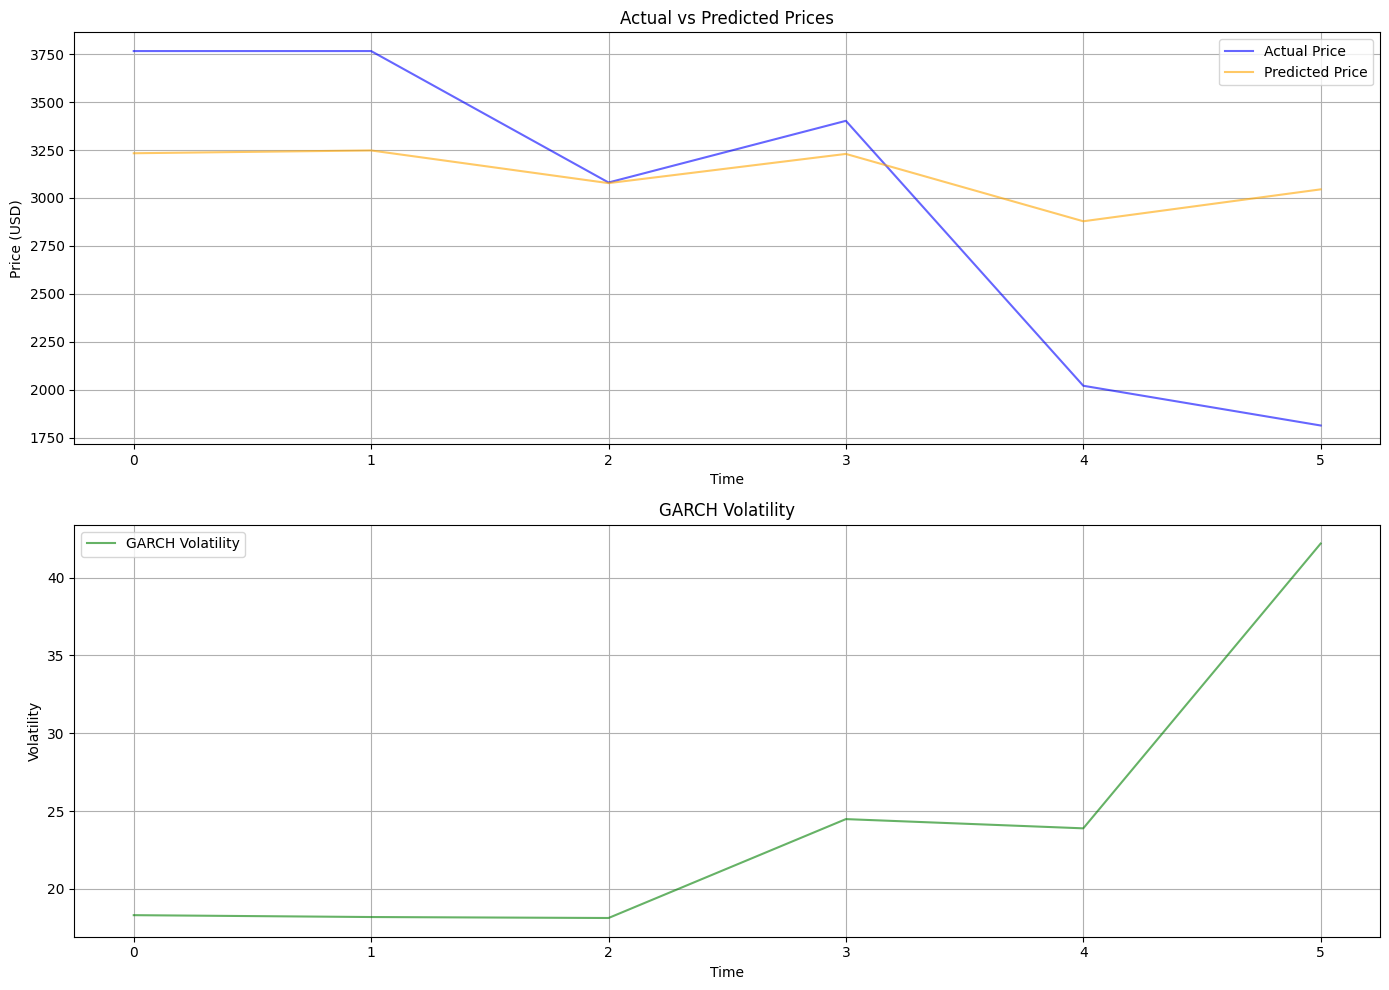

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from arch import arch_model

# Assuming you have already fitted your GARCH model and MLP model
# Here's how to visualize the results.

# 1. Prepare the DataFrame for plotting
# Ensure your DataFrame df has the necessary columns
# df['PriceUSD'] = ...  # Actual prices
# df['Predicted Price'] = test_predictions  # MLP predictions
# df['GARCH Volatility'] = garch_fitted.conditional_volatility

# Create a DataFrame for actual vs predicted
results_df = pd.DataFrame({
    'Actual Price': df['PriceUSD'].iloc[train_size+val_size:].values,
    'Predicted Price': test_predictions,
    'GARCH Volatility': df['GARCH Volatility'].iloc[train_size+val_size:].values
})

# 2. Plotting Actual vs Predicted Prices and GARCH Volatility
plt.figure(figsize=(14, 10))

# Plot Actual vs Predicted Prices
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(results_df['Actual Price'], label='Actual Price', color='blue', alpha=0.6)
plt.plot(results_df['Predicted Price'], label='Predicted Price', color='orange', alpha=0.6)
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()

# Plot GARCH Volatility
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(results_df['GARCH Volatility'], label='GARCH Volatility', color='green', alpha=0.6)
plt.title('GARCH Volatility')
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.legend()
plt.grid()

plt.tight_layout()  # Adjusts the subplot parameters to give specified padding
plt.show()


In [ ]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Assuming you have already fitted your GARCH model and MLP model
# Prepare your DataFrame for plotting

# 1. Prepare the DataFrame for plotting
#results_df = pd.DataFrame({
   # 'Actual Price': df['PriceUSD'].iloc[train_size + val_size:].values,
   # 'Predicted Price': test_predictions,
  #  'GARCH Volatility': df['GARCH Volatility'].iloc[train_size + val_size:].values
#})

# 2. Create a subplot with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add Actual Price trace
fig.add_trace(go.Scatter(
    x=results_df.index,
    y=results_df['Actual Price'],
    mode='lines',
    name='Actual Price',
    line=dict(color='blue', width=2),
    hoverinfo='text',
    hovertext='<b>Actual Price</b>: ' + results_df['Actual Price'].astype(str)
), secondary_y=False)  # First y-axis

# Add Predicted Price trace
fig.add_trace(go.Scatter(
    x=results_df.index,
    y=results_df['Predicted Price'],
    mode='lines',
    name='Predicted Price',
    line=dict(color='orange', width=2),
    hoverinfo='text',
    hovertext='<b>Predicted Price</b>: ' + results_df['Predicted Price'].astype(str)
), secondary_y=False)  # First y-axis

# Add GARCH Volatility trace
fig.add_trace(go.Scatter(
    x=results_df.index,
    y=results_df['GARCH Volatility'],
    mode='lines',
    name='GARCH Volatility',
    line=dict(color='green', width=2, dash='dash'),
    hoverinfo='text',
    hovertext='<b>GARCH Volatility</b>: ' + results_df['GARCH Volatility'].astype(str)
), secondary_y=True)  # Second y-axis

# Update layout
fig.update_layout(
    title='Actual vs Predicted Prices with GARCH Volatility',
    xaxis_title='Time',
    yaxis_title='Price (USD)',  # Label for the first y-axis
    yaxis2_title='GARCH Volatility',  # Label for the second y-axis
    template='plotly_white',
    hovermode='x unified',
    showlegend=True
)

# Show the figure
fig.show()


In [ ]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Assuming you have already fitted your GARCH model and MLP model
# Prepare your DataFrame for plotting



# 2. Create a subplot with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add Actual Price trace
fig.add_trace(go.Scatter(
    #x=results_df['Date'],  # Use the Date column for x-axis
    x=df['Date'],
    y=results_df['Actual Price'],
    mode='lines',
    name='Actual Price',
    line=dict(color='blue', width=2),
    hoverinfo='text',
    hovertext='<b>Actual Price</b>: ' + results_df['Actual Price'].astype(str)
), secondary_y=False)  # First y-axis

# Add Predicted Price trace
fig.add_trace(go.Scatter(
    #x=results_df['Date'],  # Use the Date column for x-axis
    x=df['Date'],
    y=results_df['Predicted Price'],
    mode='lines',
    name='Predicted Price',
    line=dict(color='orange', width=2),
    hoverinfo='text',
    hovertext='<b>Predicted Price</b>: ' + results_df['Predicted Price'].astype(str)
), secondary_y=False)  # First y-axis

# Add GARCH Volatility trace
fig.add_trace(go.Scatter(
    #x=results_df['Date'],  # Use the Date column for x-axis
    x=df['Date'],
    y=results_df['GARCH Volatility'],
    mode='lines',
    name='GARCH Volatility',
    line=dict(color='green', width=2, dash='dash'),
    hoverinfo='text',
    hovertext='<b>GARCH Volatility</b>: ' + results_df['GARCH Volatility'].astype(str)
), secondary_y=True)  # Second y-axis

# Update layout
fig.update_layout(
    title='Actual vs Predicted Prices with GARCH Volatility',
    xaxis_title='Date',  # Update x-axis title
    yaxis_title='Price (USD)',  # Label for the first y-axis
    yaxis2_title='GARCH Volatility',  # Label for the second y-axis
    template='plotly_white',
    hovermode='x unified',
    showlegend=True
)

# Show the figure
fig.show()
